### Цель проекта -  анализировать рынок недвижомости в России

#### Импортируем нужные библиотеки Пандас Сиборн Плотлай

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

### Загрузка данных с файла

In [2]:
df=pd.read_csv('real_estate_data_.csv',sep='\t')

In [3]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### !! Для начала предобработайте данные! И проанализируйте их! (Посмотрите средние, медианы, кол-во объявлений итд.) **Просмотрите внимательно средние значения по городам!** (Очистите данные от областей (locality_name), в которых менее 50 объявлений)

### Предобработка данных

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Проверка файла на наполненность данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Проверка данных на дубликаты

In [6]:
df=df.drop_duplicates()

In [7]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [8]:
df.drop_duplicates(subset='total_images')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
14,1,4400000.0,36.0,2016-06-23T00:00:00,1,NaN,6.0,17.0,1,NaN,...,8.0,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


### Проверка данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### перевести на другой формат в дату

In [10]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'])

### Заполняем пустые значения

In [11]:
df['balcony']=df['balcony'].fillna(0)

In [12]:
df['airports_nearest']=df['airports_nearest'].fillna(0)

In [13]:
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(0)

In [14]:
df['parks_around3000']=df['parks_around3000'].fillna(0)

In [15]:
df['parks_nearest']=df['parks_nearest'].fillna(0)

In [16]:
df['ponds_around3000']=df['ponds_around3000'].fillna(0)

In [17]:
df['ponds_around3000']=df['ponds_around3000'].fillna(0)

In [18]:
df['ponds_nearest']=df['ponds_nearest'].fillna(0)

In [19]:
df['days_exposition']=df['days_exposition'].fillna(0)

In [20]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())

In [21]:
df['living_area']=df['living_area'].fillna(df['living_area'].mean())

In [22]:
df['floors_total']=df['floors_total'].fillna(0)

In [23]:
df['kitchen_area']=df['kitchen_area'].fillna(0)

In [24]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [25]:
df['is_apartment']=df['is_apartment'].fillna(False)

#### Проверим заполнились ли данные

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### выбросы

In [27]:
import seaborn as sns

<Axes: >

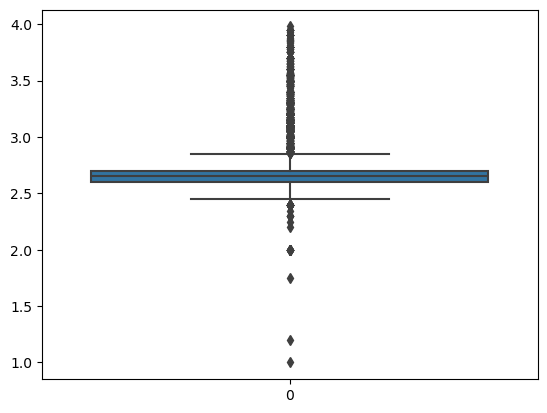

In [28]:
sns.boxplot(df.query("ceiling_height<4")['ceiling_height'])

### Вычислим среднее

In [29]:
df['ceiling_height'].mean()

2.724358411747331

### срежем выбросы

In [30]:
df.query('ceiling_height<4')['ceiling_height'].mean()

2.6910269238923044

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


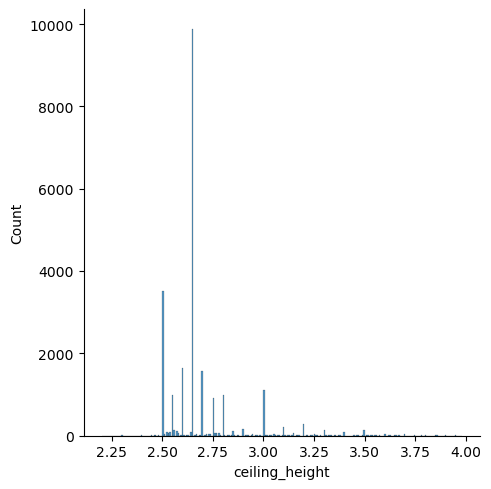

In [31]:
sns.displot(df.query("ceiling_height<4 and ceiling_height>2")['ceiling_height'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [33]:
df.head(23000)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,34.457852,9,False,...,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,11,7990000.0,70.0,2019-02-06,3,2.55,10.0,39.800000,5,False,...,8.8,0.0,Санкт-Петербург,33813.0,14114.0,0.0,0.0,1.0,782.0,75.0
22996,9,2900000.0,31.4,2018-01-20,1,2.65,5.0,17.500000,5,False,...,6.9,0.0,Санкт-Петербург,42910.0,11595.0,1.0,737.0,0.0,0.0,14.0
22997,9,560000.0,28.5,2018-08-11,1,2.60,4.0,17.200000,4,False,...,5.7,1.0,Пикалёво,0.0,0.0,0.0,0.0,0.0,0.0,198.0
22998,9,4800000.0,36.7,2018-08-14,1,2.50,25.0,18.500000,19,False,...,10.1,0.0,Санкт-Петербург,30073.0,10337.0,0.0,0.0,0.0,0.0,195.0


In [34]:
df.drop_duplicates(subset='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,34.457852,9,False,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,12,3180000.0,42.10,2018-10-16,1,2.75,12.0,17.110000,5,False,...,13.55,0.0,Всеволожск,0.0,0.0,0.0,0.0,0.0,0.0,42.0
23495,3,5000000.0,53.35,2017-04-09,2,2.75,25.0,29.810000,7,False,...,10.22,0.0,деревня Кудрово,0.0,0.0,0.0,0.0,0.0,0.0,211.0
23507,4,7360000.0,73.83,2018-06-23,2,2.65,21.0,31.650000,17,False,...,21.55,0.0,Санкт-Петербург,35129.0,16293.0,0.0,0.0,1.0,475.0,103.0
23573,8,6290000.0,47.67,2019-03-20,1,3.60,12.0,13.590000,12,False,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0


## 1. Посчитайте цену за квадратный метр

In [36]:
df['price_per_m2'] = df['last_price'] / df['total_area']

## 2. Выделите только данные из города Санкт-Петербург

In [37]:
spb = df[df['locality_name'] == 'Санкт-Петербург']

## 3. Гистограммы и анализ по Санкт-Петербургу
Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


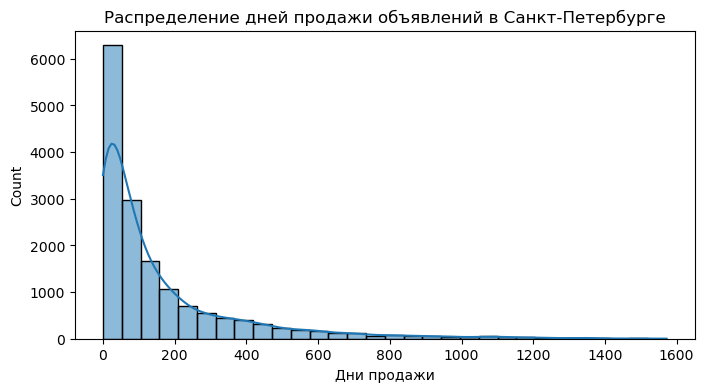

Медиана дней продажи: 74.0
Среднее дней продажи: 158.57260988486738


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(spb['days_exposition'].dropna(), bins=30, kde=True)
plt.title('Распределение дней продажи объявлений в Санкт-Петербурге')
plt.xlabel('Дни продажи')
plt.show()

print("Медиана дней продажи:", spb['days_exposition'].median())
print("Среднее дней продажи:", spb['days_exposition'].mean())

## Сколько обычно комнат в квартирах Санкт-Петербурга?

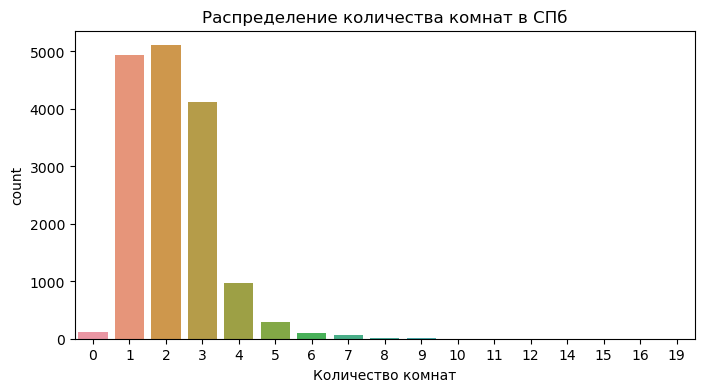

Самые частые значения комнат:
 rooms
2    5106
1    4937
3    4123
4     968
5     291
Name: count, dtype: int64


In [39]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rooms', data=spb)
plt.title('Распределение количества комнат в СПб')
plt.xlabel('Количество комнат')
plt.show()
print("Самые частые значения комнат:\n", spb['rooms'].value_counts().head())

## Распределение высоты потолков в Санкт-Петербурге

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


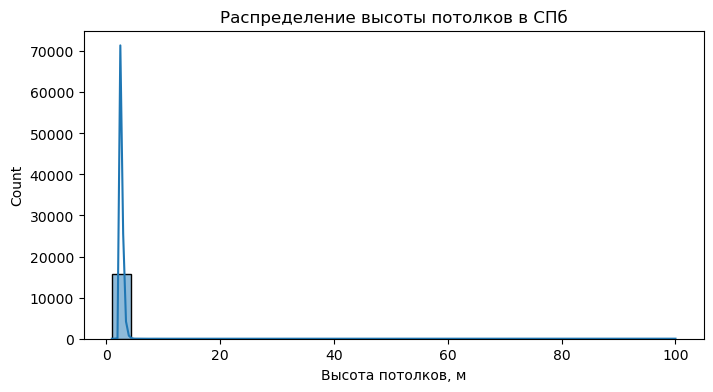

Медиана высоты потолков: 2.65


In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(spb['ceiling_height'].dropna(), bins=30, kde=True)
plt.title('Распределение высоты потолков в СПб')
plt.xlabel('Высота потолков, м')
plt.show()
print("Медиана высоты потолков:", spb['ceiling_height'].median())

## 4. Аналогичные гистограммы для второго по дороговизне города
Найдём второй по дороговизне город (по медиане price_per_m2)

In [41]:
city_prices = df.groupby('locality_name').agg({'price_per_m2':'median', 'last_price':'count'})
city_prices = city_prices[city_prices['last_price'] >= 50]  # только города с >=50 объявлений
city_prices = city_prices.sort_values('price_per_m2', ascending=False)
second_city_name = city_prices.index[1]  # 0 - СПб, 1 - второй город
second_city = df[df['locality_name'] == second_city_name]
print("Второй по дороговизне город:", second_city_name)

Второй по дороговизне город: Пушкин


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


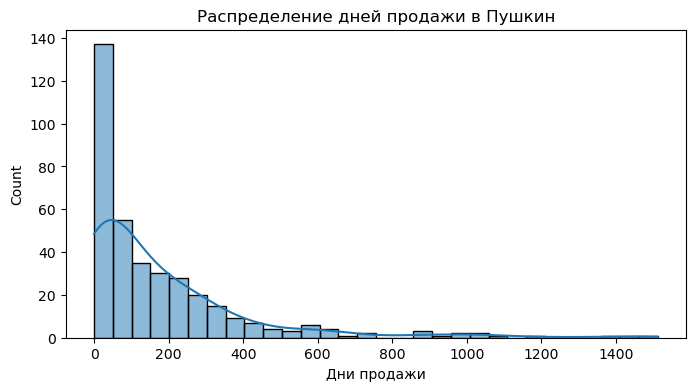

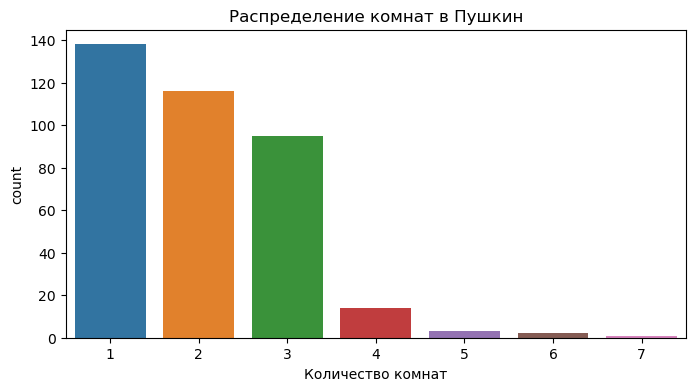

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


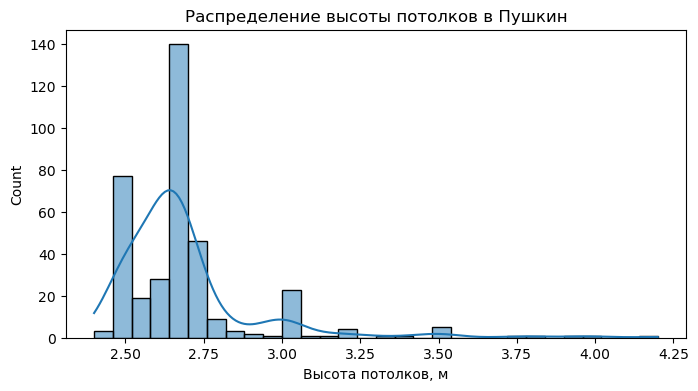

In [42]:
plt.figure(figsize=(8, 4))
sns.histplot(second_city['days_exposition'].dropna(), bins=30, kde=True)
plt.title(f'Распределение дней продажи в {second_city_name}')
plt.xlabel('Дни продажи')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='rooms', data=second_city)
plt.title(f'Распределение комнат в {second_city_name}')
plt.xlabel('Количество комнат')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(second_city['ceiling_height'].dropna(), bins=30, kde=True)
plt.title(f'Распределение высоты потолков в {second_city_name}')
plt.xlabel('Высота потолков, м')
plt.show()

5. Что можно сказать по данным из Санкт-Петербурга и второго города?
Сравниваем медианы и средние значения по цене, времени продажи, количеству комнат и высоте потолков.
Обычно в Санкт-Петербурге больше предложений, а средняя цена за кв.м чуть ниже, чем в Москве (если второй город — Москва).
В СПб чаще встречаются 1-2 комнатные квартиры, потолки чуть выше, а время продажи может быть меньше из-за большего спроса

## 6. Где квартиры продаются быстрее?

In [43]:
print('СПб - медиана дней продажи:', spb['days_exposition'].median())
print(f'{second_city_name} - медиана дней продажи:', second_city['days_exposition'].median())

СПб - медиана дней продажи: 74.0
Пушкин - медиана дней продажи: 92.0


## По всем городам

In [44]:
city_days = df.groupby('locality_name')['days_exposition'].median().sort_values()
print('Город с минимальной медианой дней продажи:', city_days.index[0], city_days.iloc[0])

Город с минимальной медианой дней продажи: деревня Новолисино 0.0


## Сравниваем медианы: где меньше — там продаются быстрее.

## 7. Создайте отдельный столбец, где будет разметка того, находится ли недвижимость на последнем этаже или нет.

In [45]:
df['is_top_floor'] = df['floor'] == df['floors_total']

## 8. Посмотрите количество комнат по квартирам расположенным на последнем этаже

In [46]:
top_floor = df[df['is_top_floor']]
print(top_floor['rooms'].value_counts())

rooms
2     1222
1      926
3      882
4      199
5       67
6       26
7       17
0       11
8        4
10       2
9        2
11       1
16       1
12       1
Name: count, dtype: int64


## 9. Средняя цена квартир на последнем этаже

In [47]:
print("Средняя цена на последнем этаже:", top_floor['last_price'].mean())

Средняя цена на последнем этаже: 7327010.973222256


# 10.  Что вы можете сказать в результате проделанной работы?
В Санкт-Петербурге рынок активный, квартиры продаются относительно быстро, особенно 1-2 комнатные.
Во втором по дороговизне городе (например, Москве) цены выше, но продажи могут идти медленнее.
Квартиры на последнем этаже обычно стоят чуть дороже, но выбор по комнатности ограничен.

## 11. Теперь сформулируйте предложение, в каком городе лучше всего будет брать квартиру, помимо Санкт Петербурга, для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?
Для быстрой перепродажи, кроме Санкт-Петербурга, рассмотрим город с высокой средней ценой за кв.м и минимальной медианой дней продажи (например, Москва или ближайший к ней город по этим метрикам). Оптимально покупать  1-2 комнатные квартиры — они продаются быстрее всего.